In [1]:
# from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import os
from Modulo import text_proc as txt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# count_vect = contVectorizer()
# x_counts = count_bect.fit_transform(np.array(x)) list of texts, each text is a string
# y = np.asrray(y)

# tdfif_transformer = tfidftransformer()
# x_tfidf = tfidf_transformer.fit_transform(x_counts)

# 2.xmlla etiqueta 1-5
# 2.review.pos --> texto lemmatizado --> eliminar los tokens que son stopwords y signos de puntuación-->

Obtenemos los archivos con los que vamos a trabajar, en este caso los review.pos y los archivos .xml

In [2]:
path = './corpusCriticasCine/'

# Obtenemos una lista con todos los archivos en el corpus y los dividimos en x, y
name_files = os.listdir(path)
pos_file = list(filter(lambda x: x.endswith('.review.pos'), name_files))
xml_file = list(filter(lambda x: x.endswith('.xml'), name_files))

# Comparamos los archivos para obtener la misma longitud
x, y = txt.obtener_y(path, pos_file, xml_file)       
print('x_file:', len(x),'\nY:', len(y))

x_file: 3878 
Y: 3878


In [3]:
text_clean =[txt.normalizar(x[i]) for i in range(len(x))]

In [4]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(np.array(text_clean)) #list of texts, each text is a string
y = np.asarray(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_counts, y, test_size=0.2, shuffle = True, random_state=0)

### Multinomial unicamente usando el vector de CountVectorizer

In [17]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_predict = clf.predict(X_test)

In [11]:
target_names = clf.classes_
labels = target_names
print(accuracy_score(y_test, y_predict))

0.45103092783505155


#### Matriz de confusion y f1 con datos de prueba

              precision    recall  f1-score   support

           1       0.43      0.04      0.08        72
           2       0.48      0.42      0.45       199
           3       0.44      0.72      0.54       247
           4       0.44      0.41      0.43       169
           5       0.53      0.18      0.27        89

    accuracy                           0.45       776
   macro avg       0.46      0.35      0.35       776
weighted avg       0.46      0.45      0.42       776

[[ 16  40  29   4   0]
 [  9  70  79  11   0]
 [  3  36 178  29   1]
 [  2   9 102  83   3]
 [  0   4  19  46   3]]


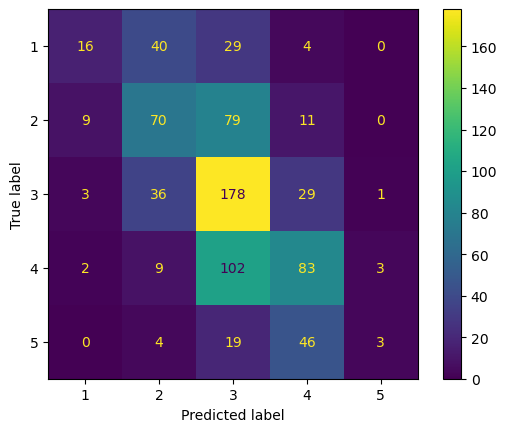

In [13]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

### Matriz de confusión con datos de entrenamiento

In [19]:
y_predict = clf.predict(X_train)

              precision    recall  f1-score   support

           1       1.00      0.50      0.67       279
           2       0.89      0.94      0.92       724
           3       0.84      0.99      0.91      1006
           4       0.92      0.93      0.93       721
           5       1.00      0.76      0.86       372

    accuracy                           0.89      3102
   macro avg       0.93      0.82      0.86      3102
weighted avg       0.90      0.89      0.89      3102

[[282  41  45   4   0]
 [  0 673  46   2   0]
 [  1   8 995   2   0]
 [  0   6  34 684   0]
 [  0   5  58  77 139]]


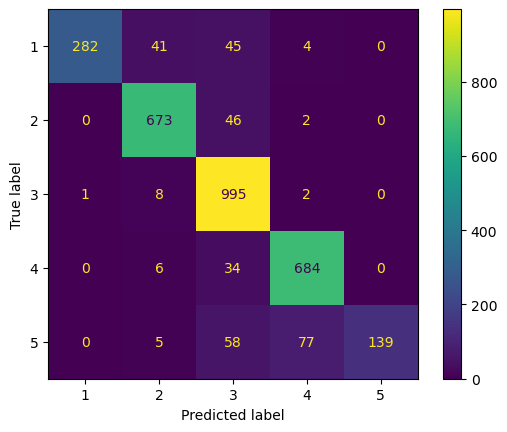

In [25]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

## Clasificados multinomial usando TfidfTRansform

In [26]:
tdfif_transformer = TfidfTransformer()
x_tfidf = tdfif_transformer.fit_transform(x_counts)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, shuffle = True, random_state=0)

In [28]:
clf = GaussianNB()
clf.fit(X_train.todense(), y_train)
    
# y_predict = clf.predict(X_test)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


GaussianNB()

### Matriz de confusion con datos de prueba

In [30]:
y_predict = clf.predict(X_test.todense())

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           1       0.20      0.03      0.05        72
           2       0.43      0.34      0.38       199
           3       0.36      0.57      0.44       247
           4       0.33      0.33      0.33       169
           5       0.23      0.10      0.14        89

    accuracy                           0.36       776
   macro avg       0.31      0.28      0.27       776
weighted avg       0.34      0.36      0.33       776

[[  9  27  48   5   0]
 [ 10  56  79  22   2]
 [ 14  51 142  39   1]
 [  5  24  97  68   5]
 [  1  13  33  23   2]]


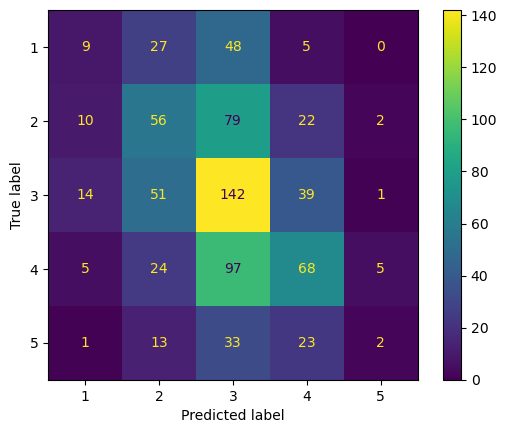

In [31]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

### Matriz de confusión, usando datos de entrenamiento

In [33]:
y_predict = clf.predict(X_train.todense())

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           1       0.99      1.00      0.99       279
           2       0.99      1.00      0.99       724
           3       1.00      0.98      0.99      1006
           4       0.99      1.00      0.99       721
           5       0.99      1.00      1.00       372

    accuracy                           0.99      3102
   macro avg       0.99      1.00      0.99      3102
weighted avg       0.99      0.99      0.99      3102

[[372   0   0   0   0]
 [  1 719   0   1   0]
 [  2   7 988   8   1]
 [  0   0   0 722   2]
 [  0   0   0   0 279]]


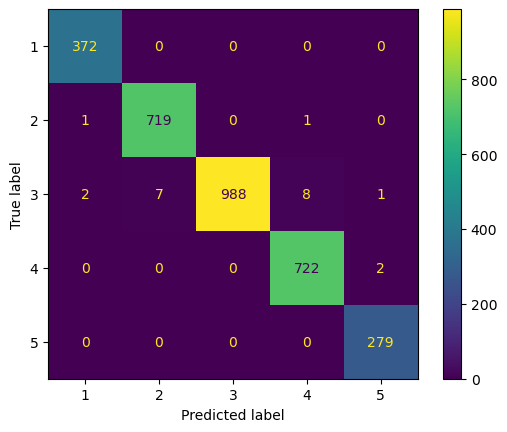

In [34]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()